In [1]:

# ------------    Load Dataset & Libraries    ------------
# Import the following packages needed to perform the analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To remove 'warnings' use 'filterwarnings'
import warnings
warnings.filterwarnings('ignore')

# plot shown in Jupyter Notebook
%matplotlib inline  
# expand the figure-width
plt.rcParams['figure.figsize'] = 8, 4


# Loading Dataset
# Import the csv dataset
movies = pd.read_csv("./MovieRatings.csv")     # load datset

# -=-=-  Explore the data  -=-=-
# Visualize the dataframe
movies

# rename the column names to single-string names
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']
movies.head()    # view dataset


# ----   convert 'numerical-type',' object-type' to "categorical-type"   ----
movies.Film = movies.Film.astype("category") # use assignment '=' to update the dataset
movies.Genre = movies.Genre.astype("category")   
movies.Year = movies.Year.astype("category")   
movies.info()   # check the data-type changes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


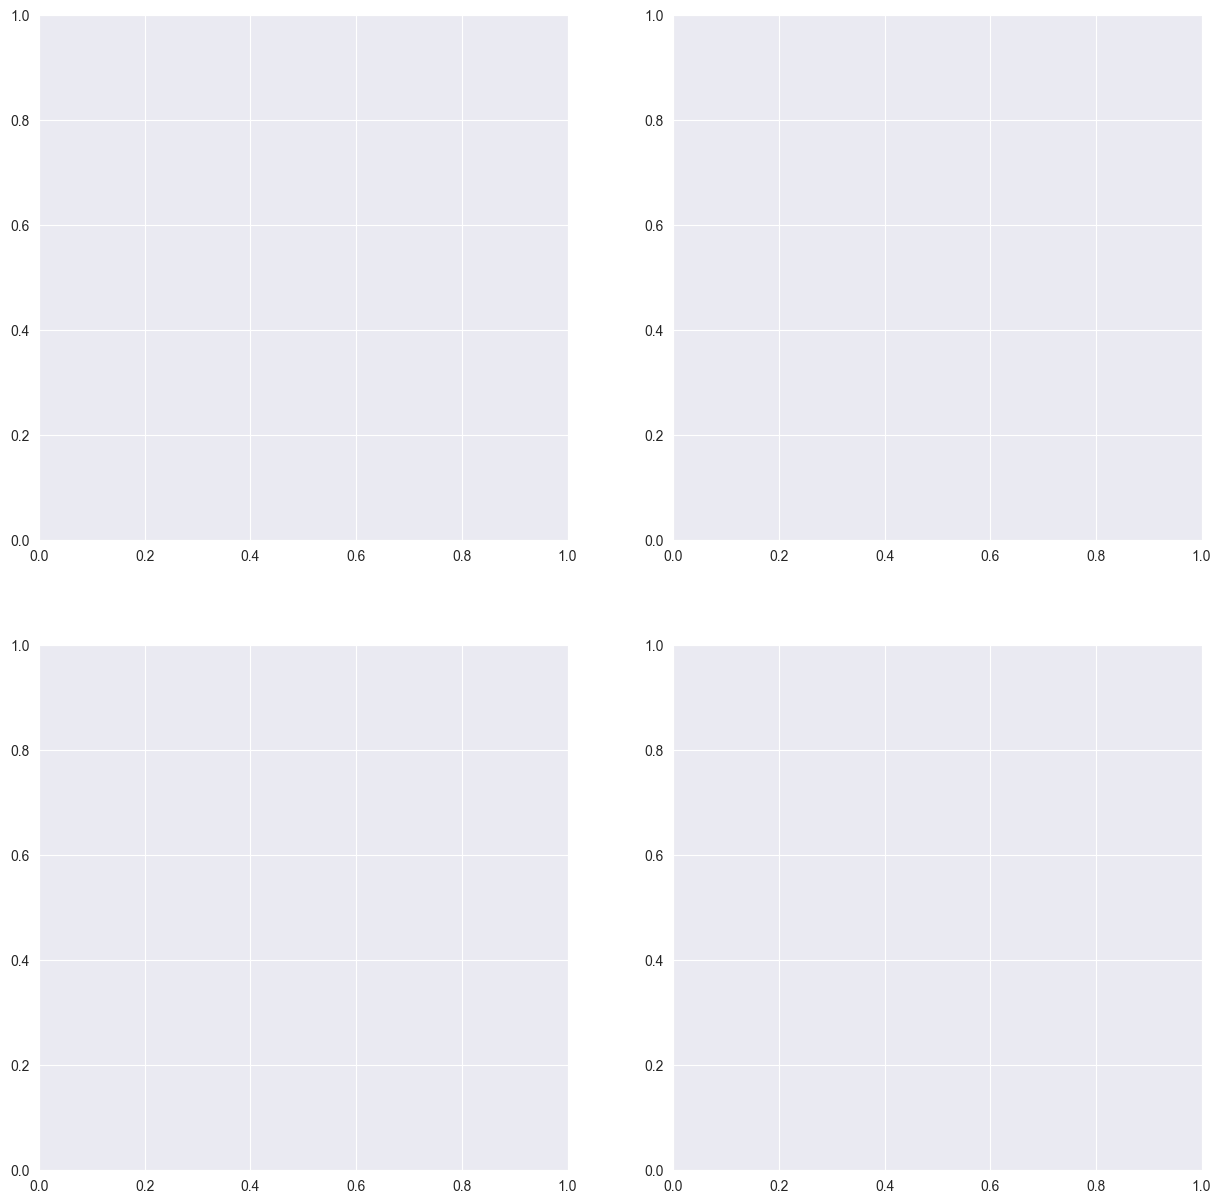

In [2]:

# In this section we'll use "subplot" to create a 'Dashboard'
    # we'll populate those dashboard with different types of chart
    # we'll use a 2x2 subplot

sns.set_style('darkgrid')   # change style
dshBd, axes = plt.subplots(2, 2, figsize = (15, 15))    # 2x2 subplot
# Note: we don't use 'sharex', 'sharey' at the first try, 
    # because we need to view all different plots first


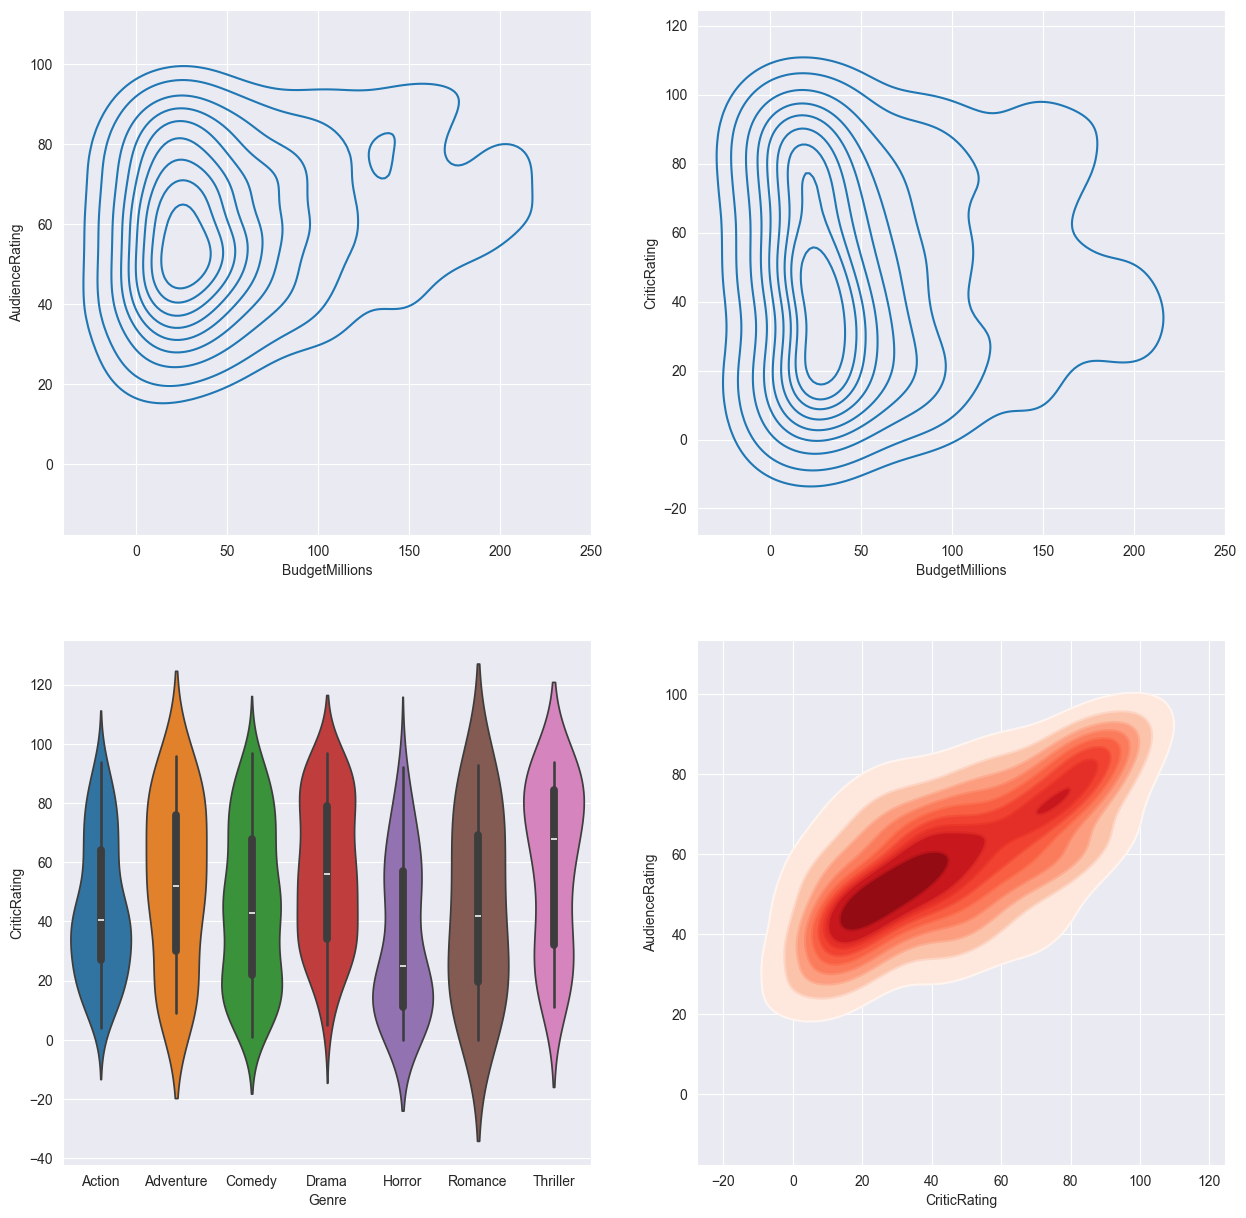

In [5]:

sns.set_style('darkgrid')   # change style
dshBd, axes = plt.subplots(2, 2, figsize = (15, 15))    # 2x2 subplot
# Note: we don't use 'sharex', 'sharey' at the first try, 
    # because we need to view all different plots first


# kdeplot: 
    # BudgetMillions' vs 'AudienceRating'
    # BudgetMillions' vs 'CriticRating'
    # notice 2D indexes used

k_BA = sns.kdeplot(data=movies, x='BudgetMillions', y='AudienceRating', ax=axes[0, 0])
k_BC = sns.kdeplot(data=movies, x='BudgetMillions', y='CriticRating', ax=axes[0, 1])
k_BA.set(xlim=(-40, 250))   # setting the RANGE for k_BA
k_BC.set(xlim=(-40, 250))   # setting the RANGE for k_BC
# We use k_BC "k_BC.set(xlim=(-20, 160))" but it can be done with 'subplots' attribute "sharex"
    # the reason is: we have different kind of plots, so we do it manually


# violinplot: we put violinplot at (1, 0)
vlp_1 = sns.violinplot(data=movies, x='Genre', y='CriticRating', hue='Genre', ax=axes[1, 0])

# kdeplot (shaded): CriticRating vs AudienceRating at (1, 1) i.e. ax=axes[1, 1]
    # combine 'shades' & 'border'  to get a overlaied plot
    # notice we also used ax=axes[1, 1] for the outlines 'kDe2'
    # we put two plots in one plotting space (overlaying)
# if we dont specify the axes, the plots will be added to the last subplot
kDe1 = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds', ax=axes[1, 1])
kDe2 = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating, cmap='Reds', ax=axes[1, 1]) # ads border on top of 'kDe5'
# kDe2 = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating, cmap='Reds', ax=axes[0, 0]) # ads border on top of 'kDe5'


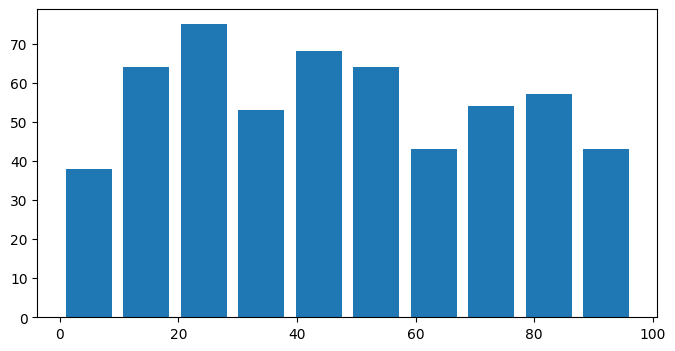

In [2]:
# Adding non-seaborn plots. EG: 'plt.hist'
hs_1 = plt.hist(movies.CriticRating, rwidth=.8)

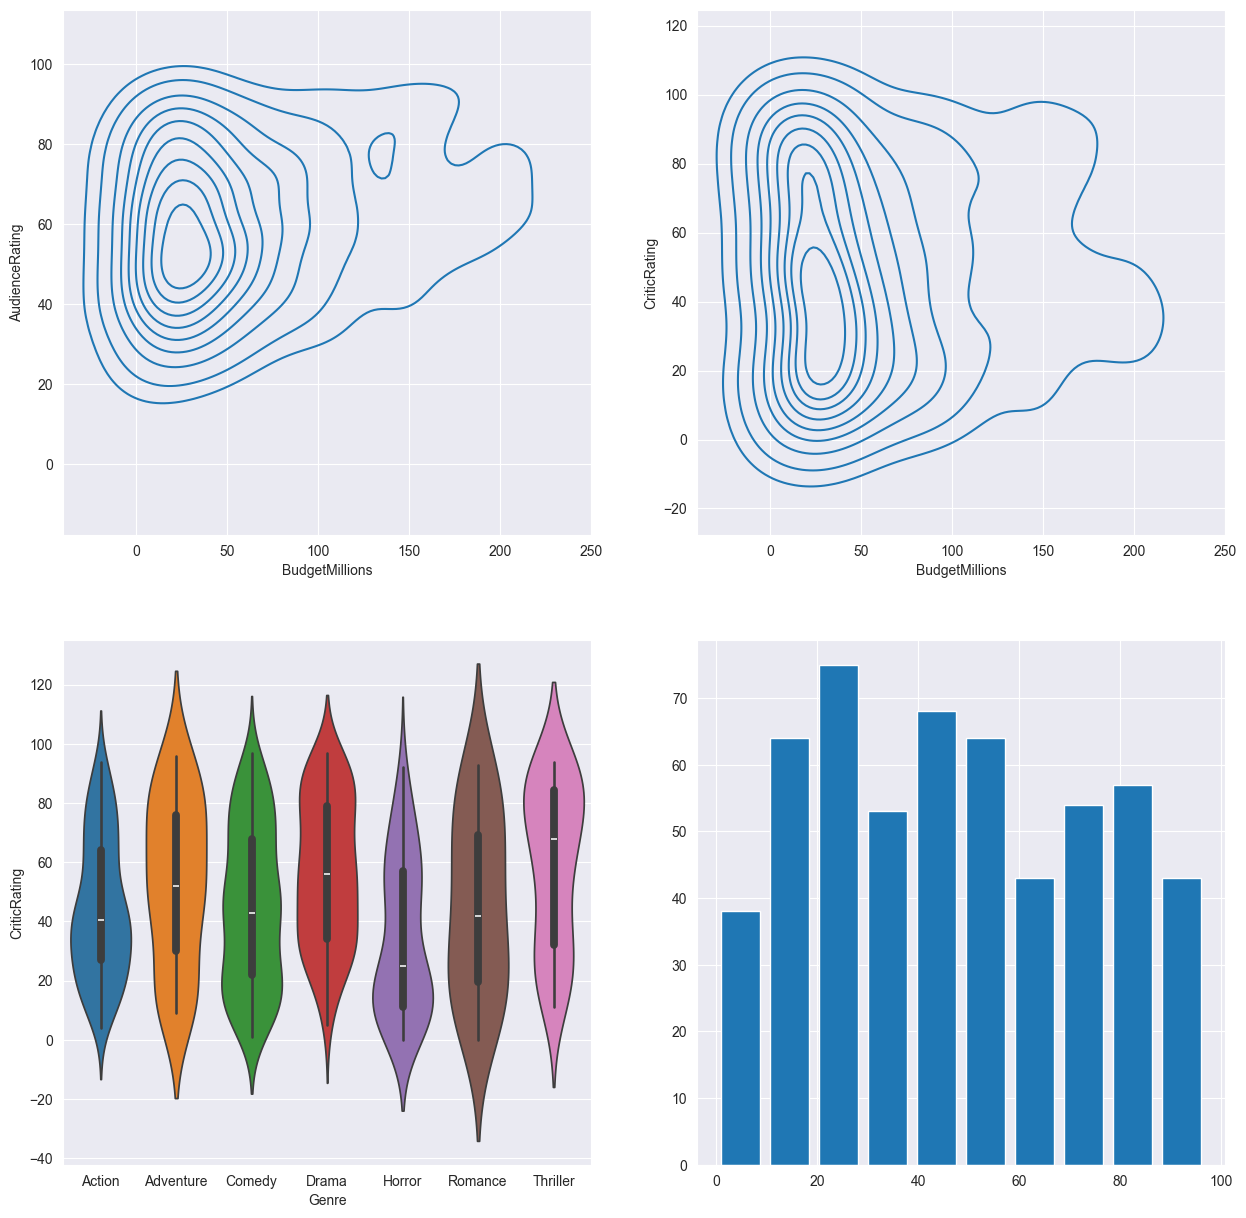

In [6]:
# Following dashboard uses a histogram as 'non-seaboarn' plot
sns.set_style('darkgrid')   # change style
dshBd_2, axes_2 = plt.subplots(2, 2, figsize = (15, 15))    # 2x2 subplot

# kdeplot:
k_BA = sns.kdeplot(data=movies, x='BudgetMillions', y='AudienceRating', ax=axes_2[0, 0])
k_BC = sns.kdeplot(data=movies, x='BudgetMillions', y='CriticRating', ax=axes_2[0, 1])
k_BA.set(xlim=(-40, 250))   # setting the RANGE for k_BA
k_BC.set(xlim=(-40, 250))   # setting the RANGE for k_BC

# violinplot: we put violinplot at (1, 0)
vlp_1 = sns.violinplot(data=movies, x='Genre', y='CriticRating', hue='Genre', ax=axes_2[1, 0])

# Histogram
axes_2[1, 1].hist(movies.CriticRating, rwidth=.8) 
plt.show()

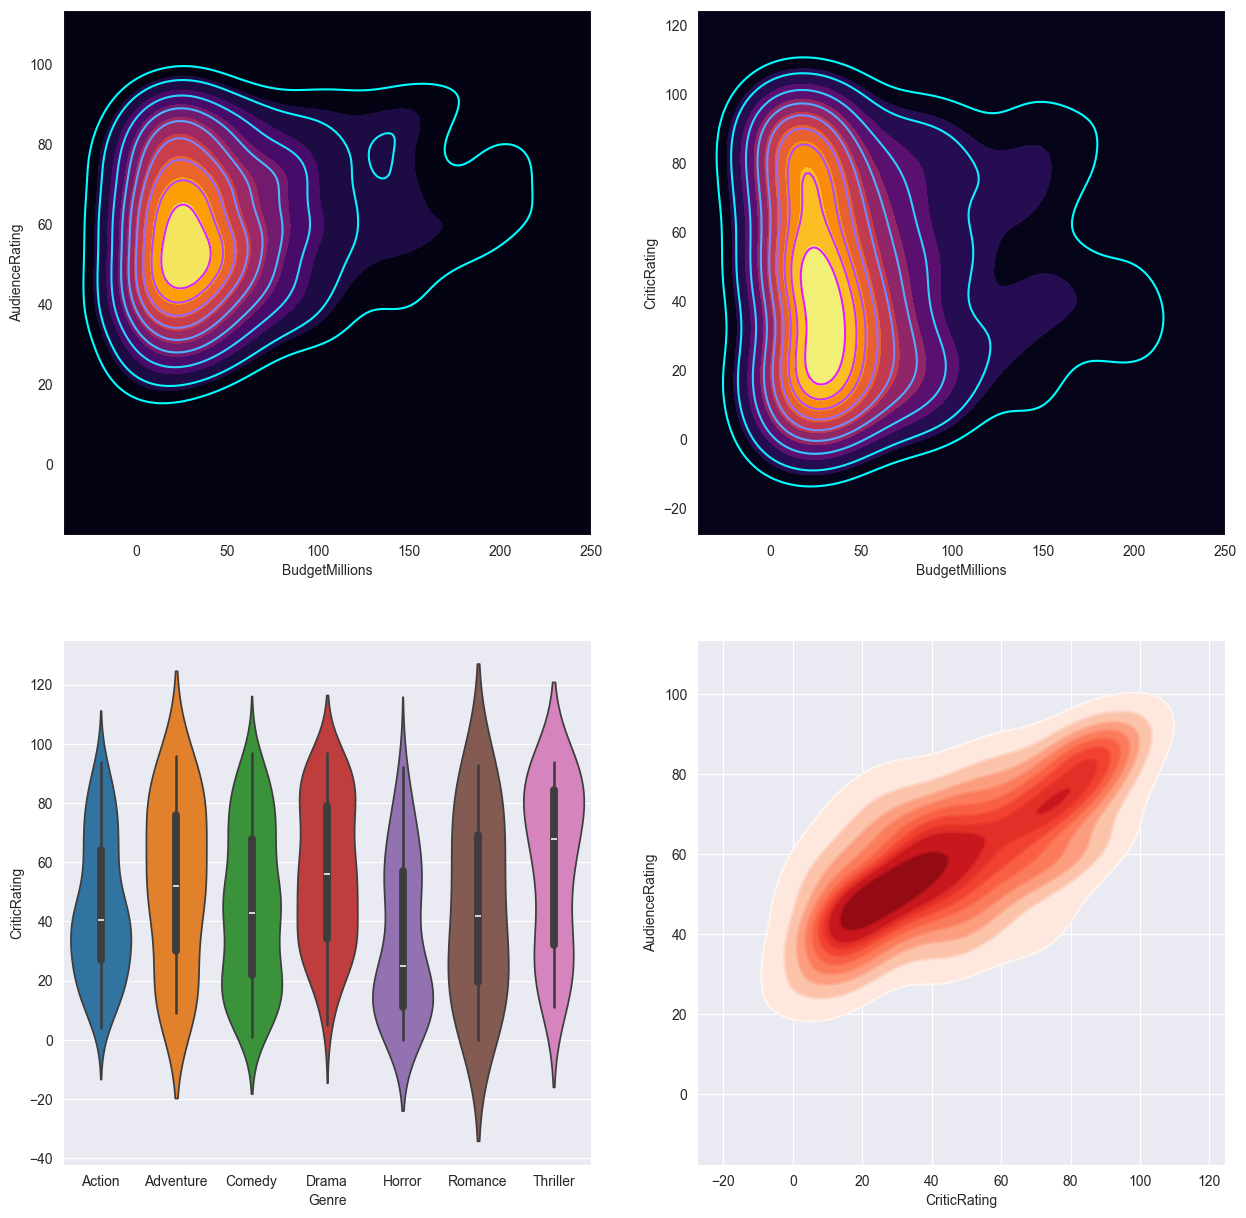

In [4]:

# ------------    Styling Dashboard    ------------
# Styling Tips:
    # we can style our existing Dashboard to look more professional
    # To make more interesting to make people read it

# We'll style our previous Dashboard as below:
    # How to style?
        # we first style 'k_BA' and 'k_BC' as we did for 'kDe1' (shade, cmap or color map)
        # we'll use different color map for 'k_BA' and 'k_BC' because they related to 'budget and ratings'
        # so that reader can differ 'k_BA' and 'k_BC' from 'kDe1'

# Tip 1: How to get all available color easily?
    # TYPO: make a typo in cmap='Reds'. Eg: cmap='Redos12'
    # it'll generate an error with showing all available colors
    # copy all those color to a list and use that later
    # Reverse: to reverse a colormap use '_r'. Eg: 'inferno' to 'inferno_r'

sns.set_style('darkgrid')   # change style
dshBd_3, axes_3 = plt.subplots(2, 2, figsize = (15, 15))    # 2x2 subplot


# -=-=-=-   kdeplot   -=-=-=-
# Plot [0,0]
    # we'll use 'inferno' for sahding and 'cool' for outlines
k_BA_s = sns.kdeplot(data=movies, x='BudgetMillions', y='AudienceRating', shade=True, shade_lowest=True, cmap='inferno', ax=axes_3[0, 0])
k_BAo_s = sns.kdeplot(data=movies, x='BudgetMillions', y='AudienceRating', cmap='cool', ax=axes_3[0, 0])

# Plot [0,1]
k_BC_s = sns.kdeplot(data=movies, x='BudgetMillions', y='CriticRating', shade=True, shade_lowest=True, cmap='inferno', ax=axes_3[0, 1])
k_BC_s = sns.kdeplot(data=movies, x='BudgetMillions', y='CriticRating', cmap='cool', ax=axes_3[0, 1])

# setting x range for 'k_BA' and 'k_BC'
k_BA_s.set(xlim=(-40, 250))   # setting the RANGE for k_BA
k_BC_s.set(xlim=(-40, 250))   # setting the RANGE for k_BC


# -=-=-=-   violinplot   -=-=-=-
# Plot [1,0]
vlp_1_s = sns.violinplot(data=movies, x='Genre', y='CriticRating', hue='Genre', ax=axes_3[1, 0])


# -=-=-=-   kdeplot (shaded)   -=-=-=-
# Plot [1,1]
kDe1_s = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds', ax=axes_3[1, 1])
kDe2_s = sns.kdeplot(x=movies.CriticRating, y=movies.AudienceRating, cmap='Reds', ax=axes_3[1, 1]) # ads border on top of 'kDe5'
plt.show() 
